<a href="https://colab.research.google.com/github/moridin04/CCADMACL-Research/blob/main/Fraud_Detection_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Anomaly Detection Techniques for Fraudulent Credit Card Transactions**

# **1. Environment Setup**

**1.1 Tools and Libraries Installation**

In [177]:
!pip install lime
!pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import lime
import lime.lime_tabular

# 2. **Importing Libraries**

**2.1 Essential Libraries for Data Analysis**

In [178]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score, precision_recall_curve

**2.2 Libraries for Machine Learning and Visualization**

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import LocalOutlierFactor

#3. **Loading Data**

**3.1 Loading the Kaggle Credit Card Fraud Dataset**

In [180]:
cfd = pd.read_csv('creditcard.csv')

#4. **Exploration of Data**

### **Glimpse of the Dataset**

**4.1 Displaying the First Few Rows**

In [181]:
cfd

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**4.1.2 Dataset Information (Shape, Columns, Null Values, Data Types)**

In [182]:
print(f"Shape:  {cfd.shape}\n")
print(f"Columns:  {cfd.columns}\n")
print(f"Null Values:  \n{cfd.isnull().sum()}\n")
print(f"Data Types: \n{cfd.dtypes}")

Shape:  (284807, 31)

Columns:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Null Values:  
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Types: 
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64


**4.2 Summary Statistics for Numerical Features**

In [183]:
print(cfd.describe(include='all'))

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

**4.2.1 Class Distribution (Fraud vs. Non-Fraud)**

In [184]:
class_distribution = cfd['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


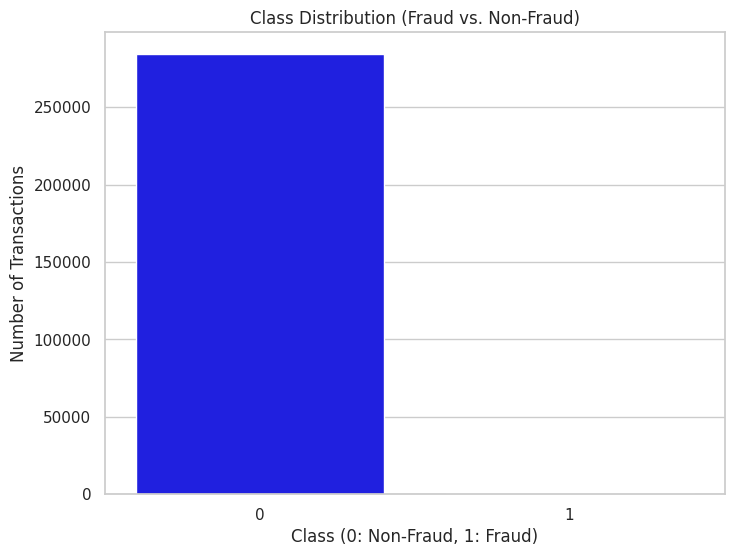

In [185]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=cfd, hue='Class', palette=['blue', 'red'], legend=False)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

### **Distribution of Independent Variable**

**4.3 Distribution of Amount**

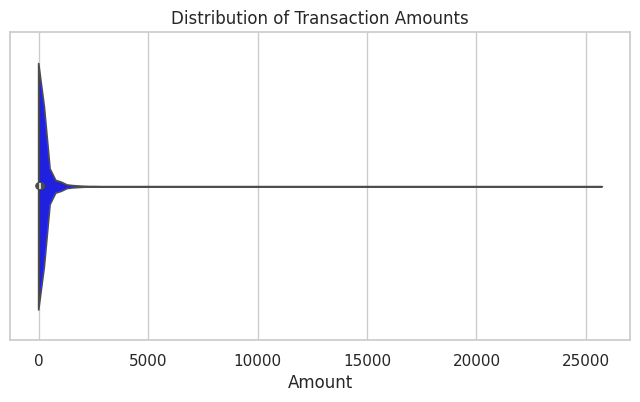

In [186]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=cfd["Amount"], color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.show()

**4.4 Distribution of Time**

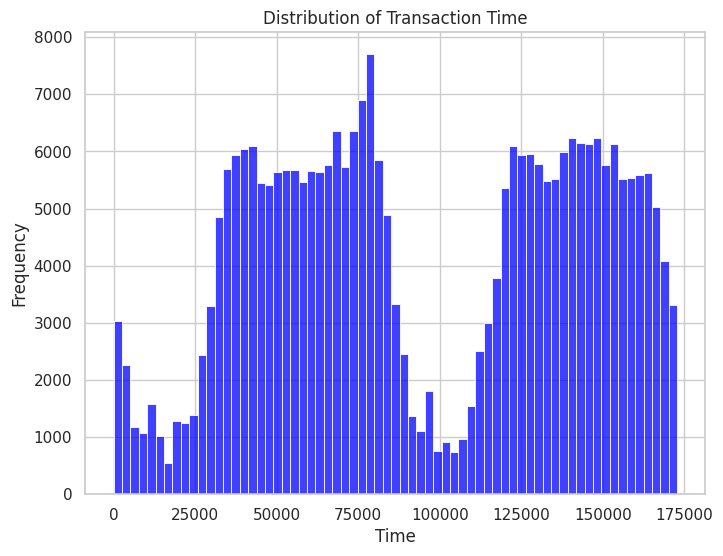

In [187]:
plt.figure(figsize=(8, 6))
sns.histplot(cfd['Time'], kde=False, color="blue")
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

**4.5 Histograms for Key Features (V1-V28, Amount, Time)**

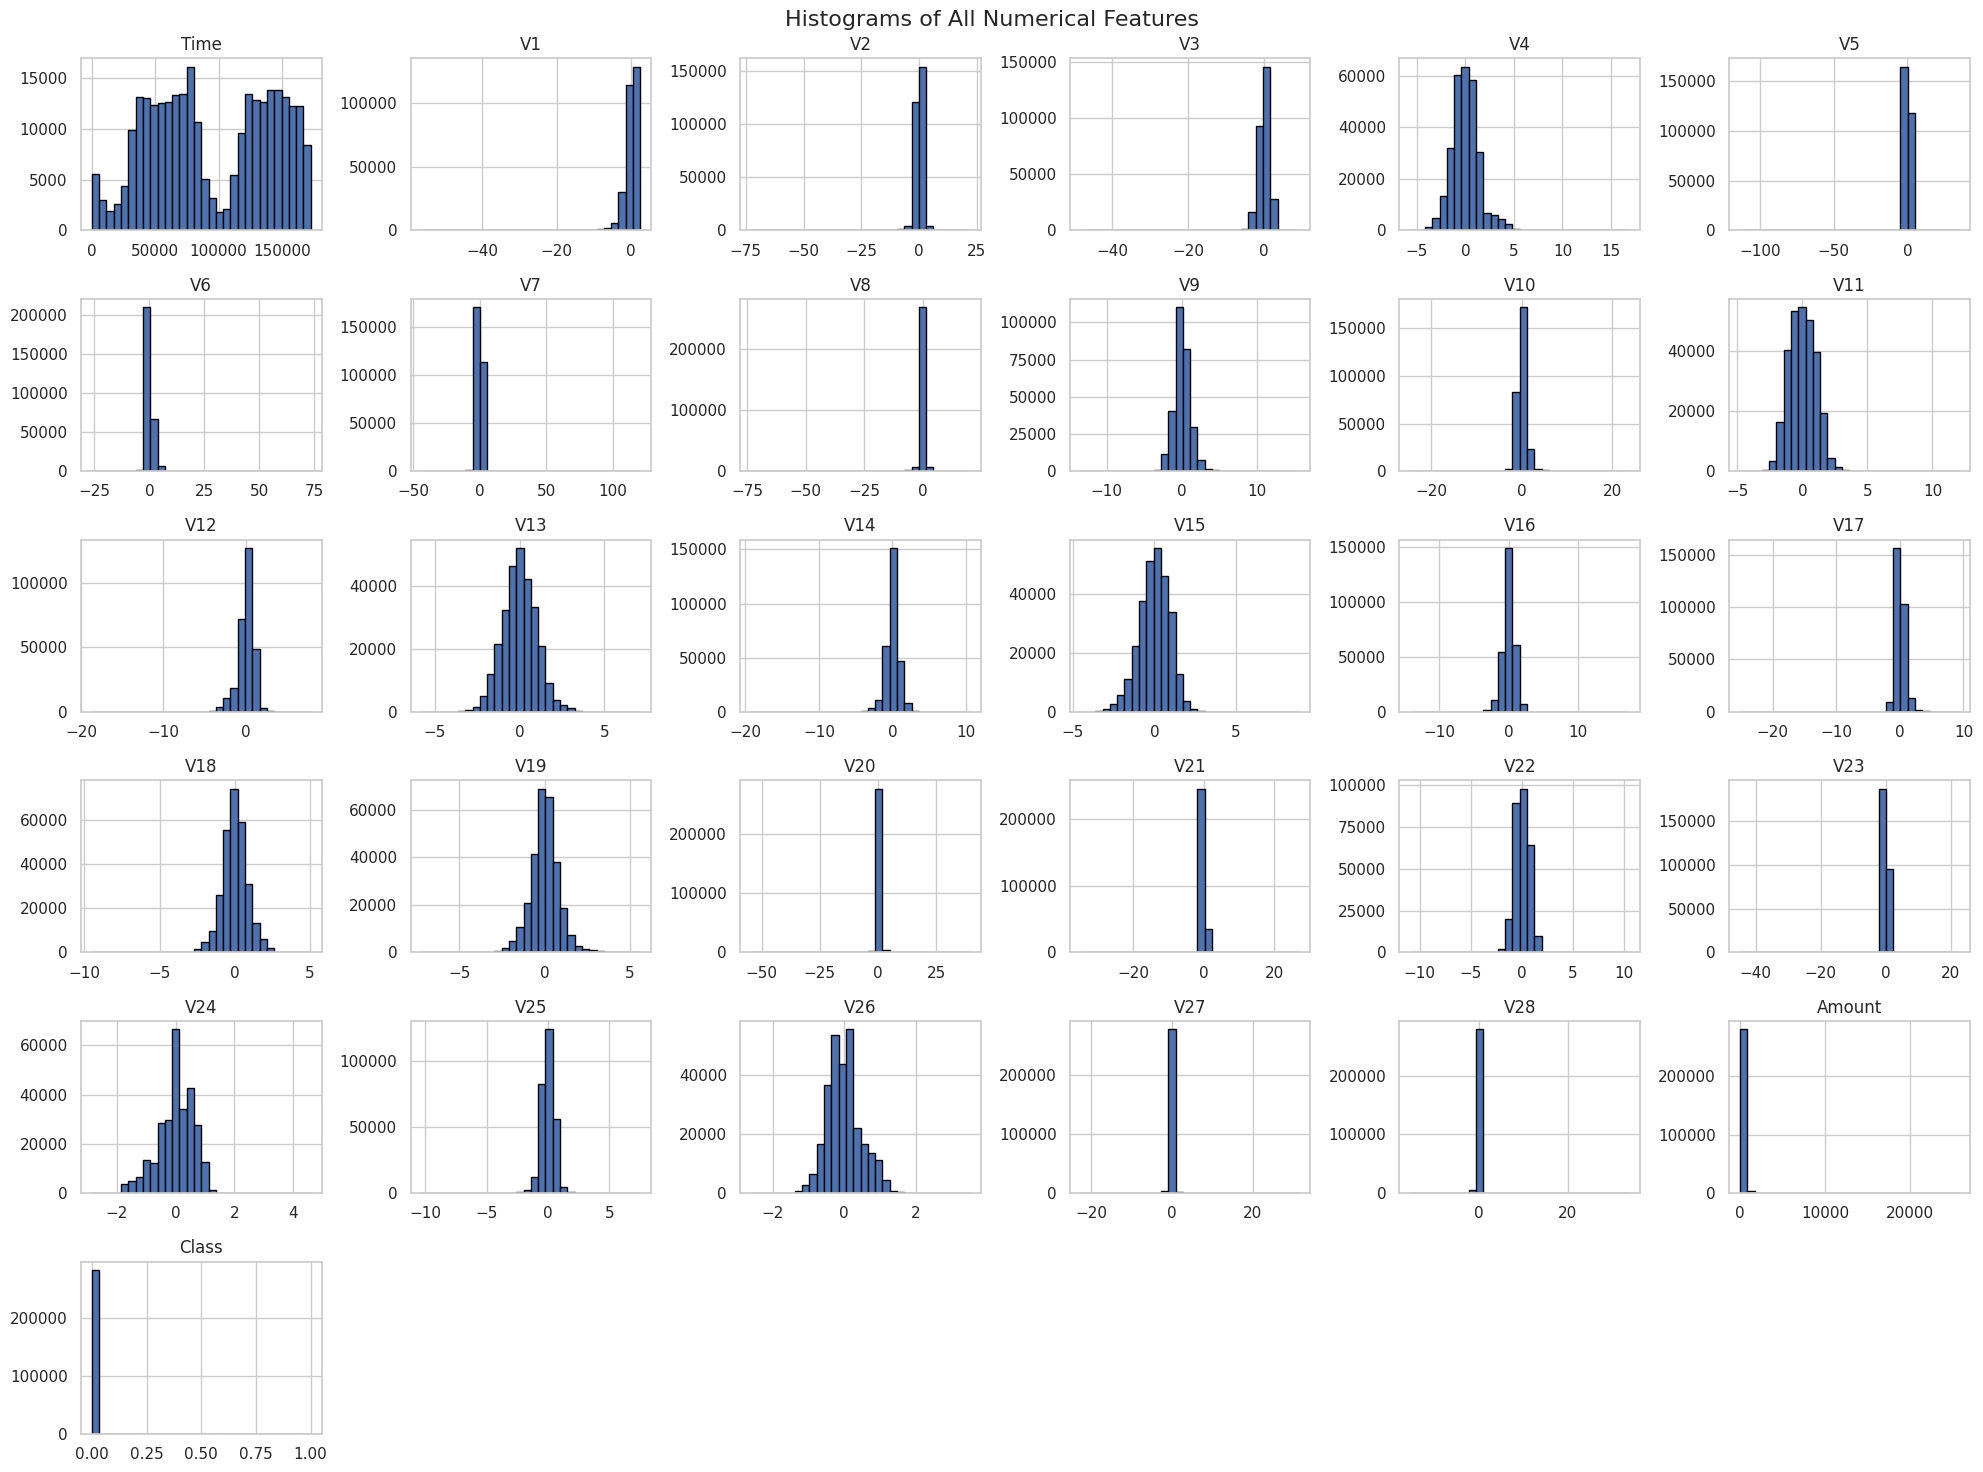

In [188]:
cfd.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms of All Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# **5. Pre-processing of Data**

**5.1 Checking of Null Values**

In [189]:
print("\nChecking for Null Values:")
cfd.isnull().sum()


Checking for Null Values:


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**5.2 Checking of Outliers**

In [190]:
Q1 = cfd['Amount'].quantile(0.25)
Q3 = cfd['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = cfd[(cfd['Amount'] < (Q1 - 1.5 * IQR)) | (cfd['Amount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'Amount': {len(outliers)}")

Number of outliers in 'Amount': 31904


**5.3 Checking of Duplicate Transactions**

In [191]:
cfd.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
284802,False
284803,False
284804,False
284805,False


In [192]:
duplicate_counts = cfd.duplicated().value_counts()
print(duplicate_counts)

False    283726
True       1081
Name: count, dtype: int64


In [193]:

duplicate_counts = cfd.duplicated().value_counts()
print("Duplicate Counts before removal:\n", duplicate_counts)

cfd = cfd.drop_duplicates(keep='first')

duplicate_counts = cfd.duplicated().value_counts()
print("\nDuplicate Counts after removal:\n", duplicate_counts)

Duplicate Counts before removal:
 False    283726
True       1081
Name: count, dtype: int64

Duplicate Counts after removal:
 False    283726
Name: count, dtype: int64


**5.4 Feature Selection/Reduction**

**5.4.1 Correlation Matrix for Numerical Features**

In [194]:
correlation_matrix = cfd.corr()

**5.4.2 Heatmap Visualization**

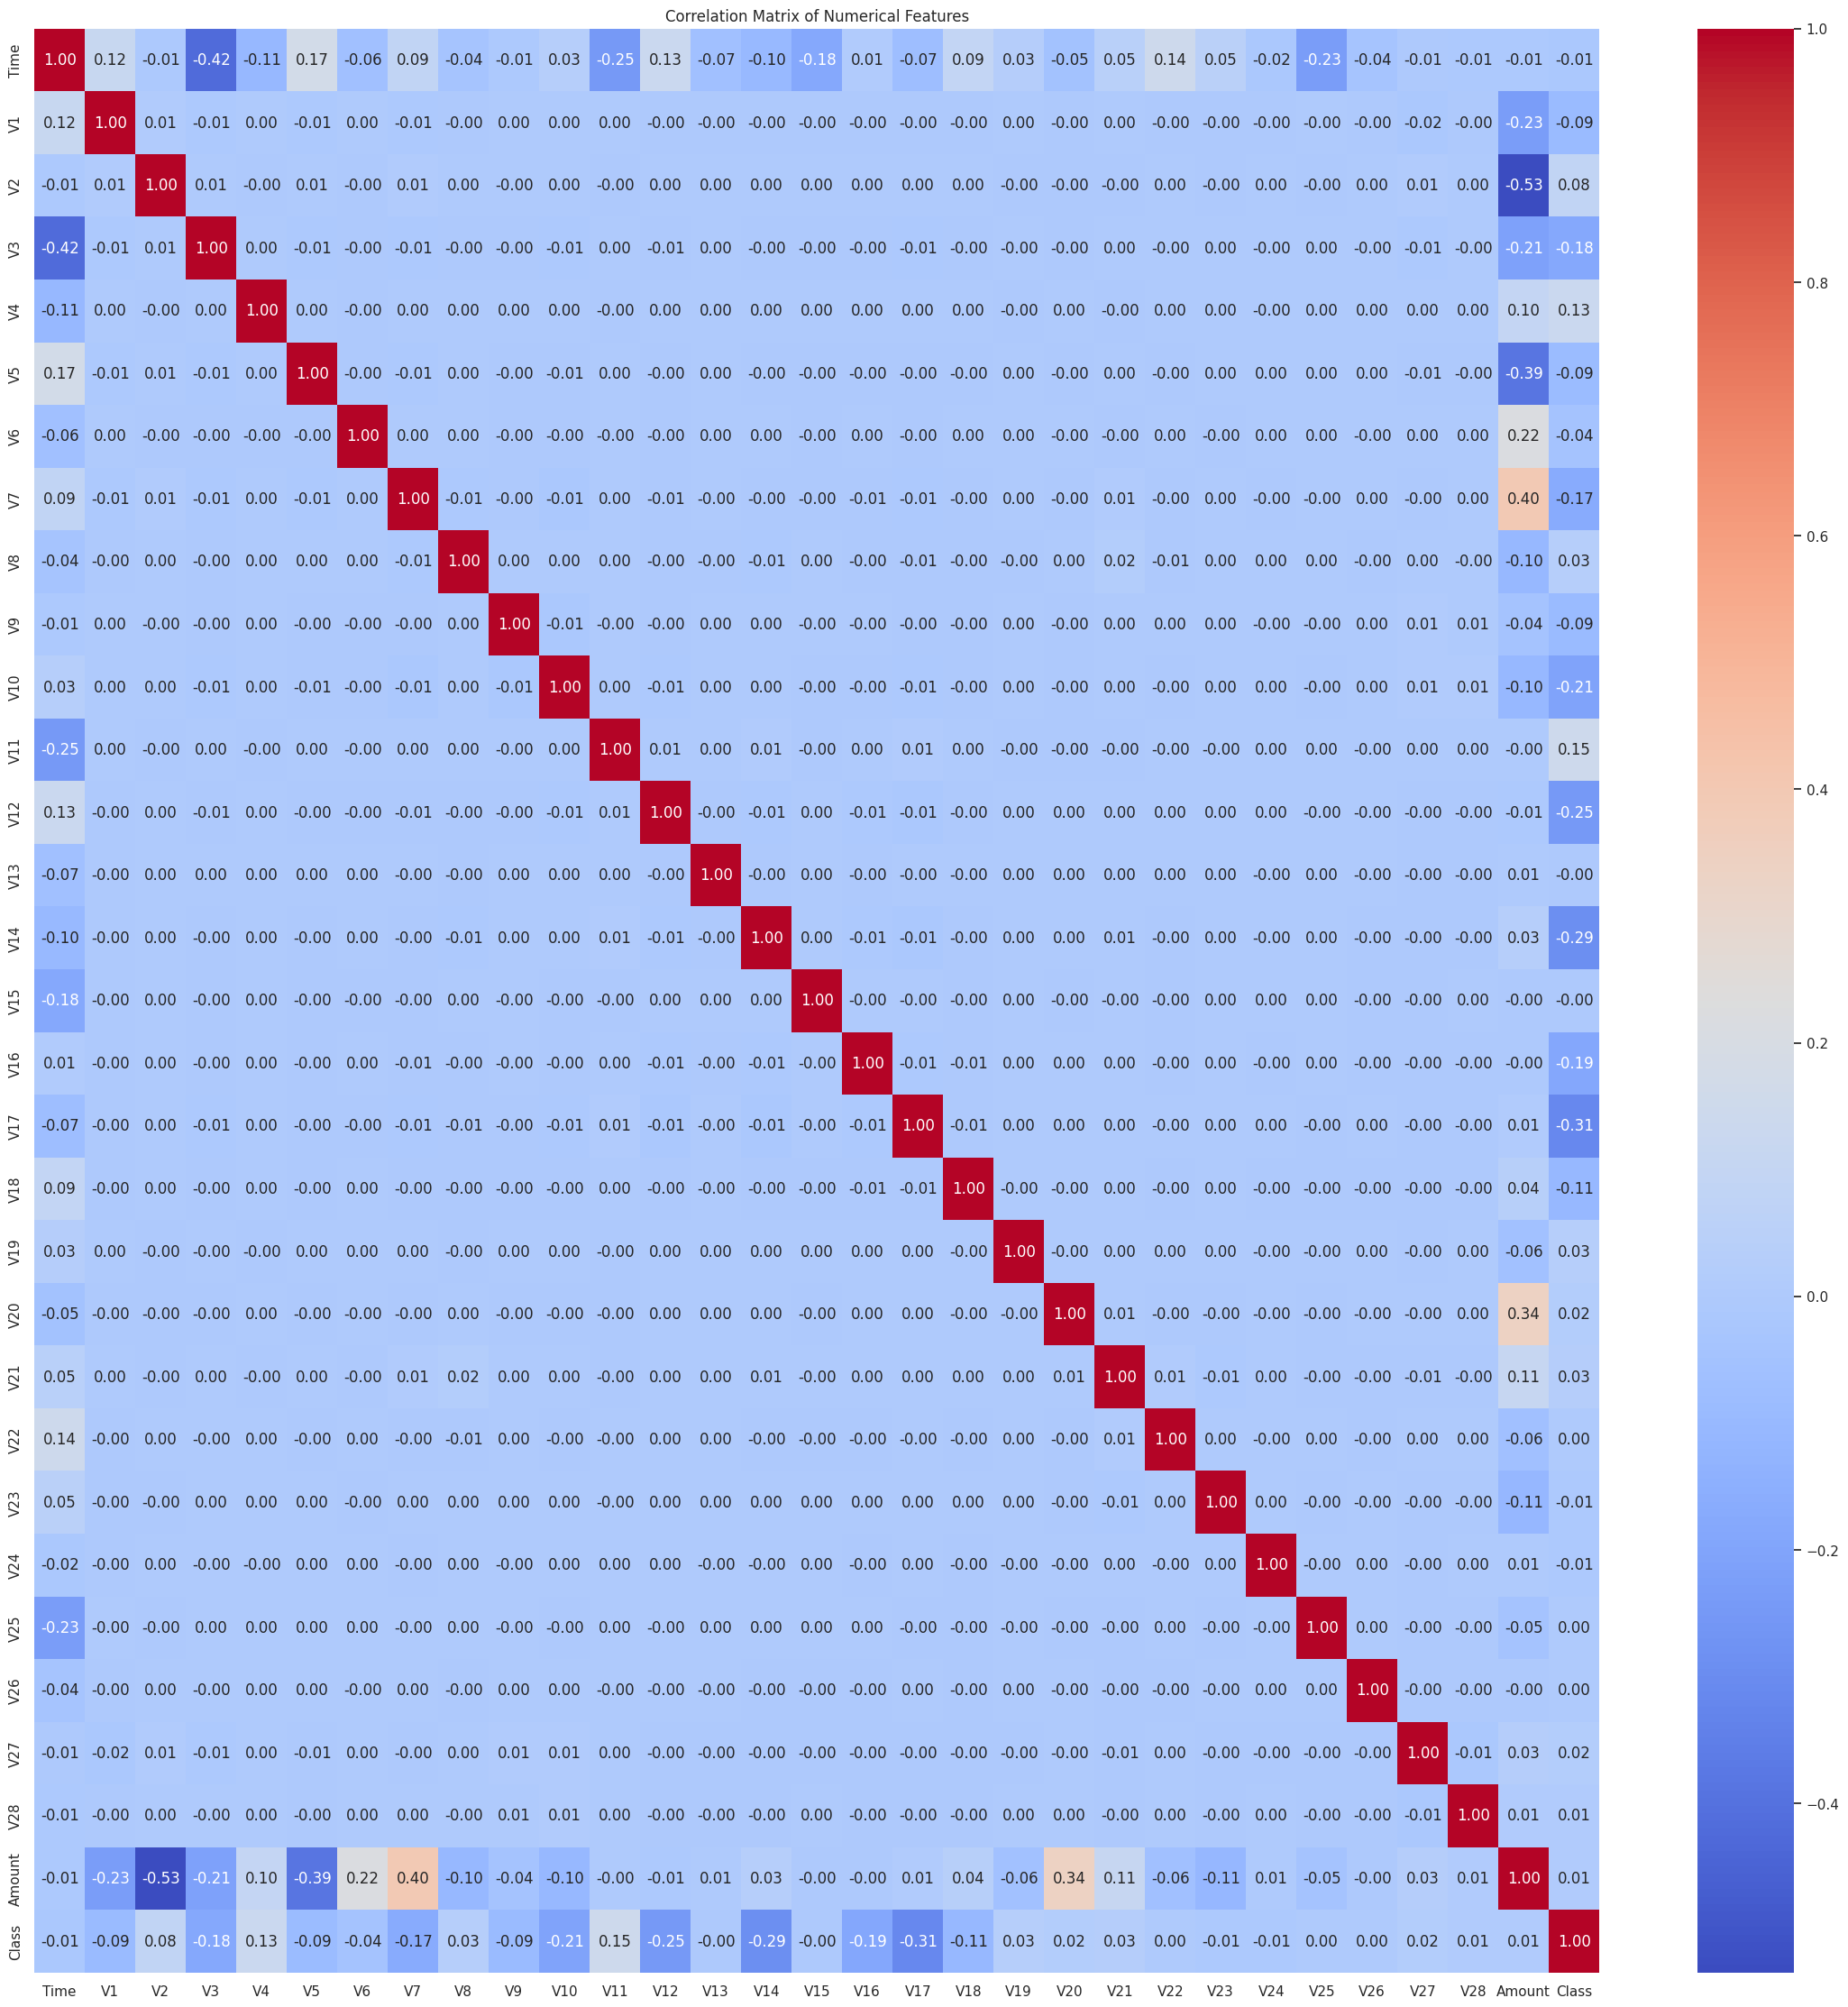

In [195]:
plt.figure(figsize=(28, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**5.4.3 Dropping Irrelevant Features**

In [196]:

threshold = 0.8
high_corr_features = set()
correlation_matrix = cfd.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly correlated features to drop:", high_corr_features)

cfd = cfd.copy()
cfd.drop(columns=high_corr_features, inplace=True)
print(f"Updated dataset shape: {cfd.shape}")

Highly correlated features to drop: set()
Updated dataset shape: (283726, 31)


### **Application of Standard Scaler**

**5.5 Feature Scaling**

**5.5.1 Standardization (Z-Score Scaling)**

In [197]:
cfd_scaled = cfd.copy()

scaler = StandardScaler()
cfd_scaled[['Amount']] = scaler.fit_transform(cfd_scaled[['Amount']])

In [198]:
cfd_scaled['Amount'].describe()

,Amount
count,2.837260e+05
mean,-5.409347e-17
std,1.000002e+00
min,-3.533268e-01
25%,-3.309625e-01
50%,-2.654671e-01
75%,-4.378088e-02
max,1.022476e+02


**5.5.2 Normalization (Min-Max Scaling)**

In [199]:
time = cfd_scaled['Time']
cfd_scaled['Time'] = (time - time.min()) / (time.max() - time.min())

In [200]:
cfd_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [201]:
cfd_shuffled = cfd_scaled.sample(frac=1, random_state=1).copy()
cfd_shuffled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33560,0.215768,-1.071719,-4.343904,-0.497727,-0.277591,-2.482346,-0.472073,0.991747,-0.414207,1.694252,...,0.856441,0.013647,-1.183439,0.536058,0.064148,-0.016945,-0.179133,0.236036,4.506916,0
57869,0.278456,1.314915,-0.980378,-0.032665,-2.770975,-1.047365,-0.705180,-0.491240,-0.076395,0.571959,...,-0.416346,-0.481886,-0.009117,0.009622,0.555844,-0.836622,0.099256,0.014826,-0.248255,0
187479,0.738194,-1.680526,-0.959150,-1.329705,-1.028361,-0.730922,0.253124,3.308312,-0.480062,0.157630,...,-0.084593,-0.204108,0.517400,-0.611013,-0.445912,-0.409744,0.231809,0.253554,2.365973,0
243555,0.879526,2.114488,0.169976,-2.051966,0.070326,0.481642,-1.819440,0.886700,-0.673729,0.077960,...,0.163748,0.642597,-0.058720,0.128632,0.461792,0.234073,-0.082360,-0.075323,-0.301729,0
96229,0.380081,-5.277692,3.487837,-1.201844,-0.192904,-0.158582,0.949549,0.467901,-0.788434,4.652615,...,-0.477313,-1.077669,0.160074,-1.535126,0.873245,-0.322503,1.383375,0.758996,-0.237911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21515,0.183562,1.221811,-0.622699,0.271691,-0.507132,-1.093817,-1.303639,-0.166317,-0.390254,-1.080318,...,0.302138,0.641491,-0.168266,0.791311,0.586821,-0.150528,-0.016895,0.032471,0.068200,0
118050,0.433643,1.069132,-0.159789,1.913486,2.811710,-0.690517,1.942449,-1.259828,0.577277,1.031453,...,0.046602,0.725405,-0.199566,-0.678442,0.552088,0.328766,0.118229,0.029660,-0.353327,0
73633,0.319552,-0.891311,0.808612,1.263076,0.522615,1.183978,0.905303,0.565347,0.186910,-1.042086,...,0.129436,0.443403,-0.327563,-1.315188,0.647441,-0.057036,-0.014691,0.038455,-0.281681,0
268346,0.944280,-0.358224,1.446564,-1.175105,0.075659,2.041475,-1.677117,1.568559,-0.415562,-1.073097,...,0.078727,0.333168,-0.350660,0.947248,0.196432,0.700004,0.079430,0.208233,-0.350292,0


**5.6 Train, Test, and Validation**

In [202]:
x = cfd_shuffled.drop(columns=['Class'])
y = cfd_shuffled['Class']

**5.7 Splitting the Dataset into Training and Testing Sets**

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# **6. Machine Learning**

### **Isolation Forest**

In [305]:
if_model = IsolationForest(contamination='auto', random_state=101)
if_model.fit(x_train)

KeyboardInterrupt: 

In [256]:
fraud_test = x_test[y_test == 1]
non_fraud_test = x_test[y_test == 0].sample(len(fraud_test), random_state=45)
x_test_balanced = pd.concat([fraud_test, non_fraud_test])
y_test_balanced = np.concatenate([np.ones(len(fraud_test)), np.zeros(len(non_fraud_test))])

In [257]:
if_y_pred = (if_model.predict(x_test_balanced) == -1).astype(int)
print(classification_report(y_test_balanced, if_y_pred))
if_roc_auc = roc_auc_score(y_test_balanced, if_y_pred)
print("ROC AUC Score:", if_roc_auc)
if_auprc = average_precision_score(y_test_balanced, if_y_pred)
print(f"AUPRC for Isolation Forest:", if_auprc)

              precision    recall  f1-score   support

         0.0       0.57      0.99      0.72        95
         1.0       0.96      0.24      0.39        95

    accuracy                           0.62       190
   macro avg       0.76      0.62      0.55       190
weighted avg       0.76      0.62      0.55       190

ROC AUC Score: 0.6157894736842106
AUPRC for Isolation Forest: 0.6109649122807017


In [258]:
report_dict = classification_report(y_test_balanced, if_y_pred, output_dict=True)

In [259]:
if_accuracy = report_dict['accuracy']
if_precision = report_dict['weighted avg']['precision']
if_recall = report_dict['weighted avg']['recall']
if_f1_score = report_dict['weighted avg']['f1-score']

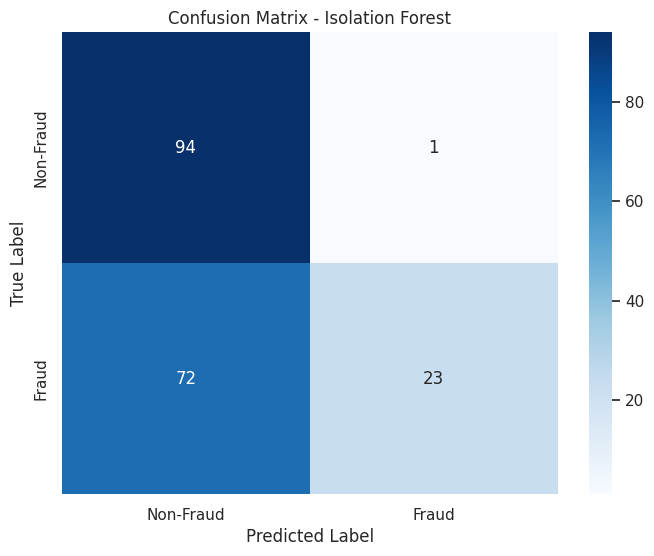

In [260]:
if_cm = confusion_matrix(y_test_balanced, if_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(if_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Isolation Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [261]:
if_kappa = cohen_kappa_score(y_test_balanced, if_y_pred)
print(f"Cohen's Kappa for Isolation Forest: {if_kappa}")

Cohen's Kappa for Isolation Forest: 0.2315789473684211


### **Autoencoders**

In [262]:
y_train_fraud = y_train[y_train == 1].sample(frac=0.1, random_state=42)
x_train_fraud = x_train.loc[y_train_fraud.index]
x_train_auto = pd.concat([x_train[y_train == 0], x_train_fraud])

In [263]:
input_dim = x_train_auto.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [264]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [265]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# autoencoder.fit(x_train_auto, x_train_auto, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

In [266]:
reconstructed = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 80)

In [267]:
y_test_pred = (mse > threshold).astype(int)
print(classification_report(y_test, y_test_pred))
ae_roc_auc = roc_auc_score(y_test, y_test_pred)
print("ROC AUC Score:", ae_roc_auc)
ae_auprc = average_precision_score(y_test, y_test_pred)
print(f"AUPRC for Autoencoder:", ae_roc_auc)

In [268]:
report_dict2 = classification_report(y_test, y_test_pred, output_dict=True)

In [269]:
ae_accuracy = report_dict2['accuracy']
ae_precision = report_dict2['weighted avg']['precision']
ae_recall = report_dict2['weighted avg']['recall']
ae_f1_score = report_dict2['weighted avg']['f1-score']

In [270]:
ae_cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(ae_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Autoencoders')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [271]:
ae_kappa = cohen_kappa_score(y_test, y_test_pred)
print(f"Cohen's Kappa for Autoencoders: {ae_kappa}")

### **Local Outlier Factor**

In [272]:
x_train_normal = x_train[y_train == 0]

In [273]:
lof_model = LocalOutlierFactor(n_neighbors=50, contamination=0.01, novelty=True)
lof_model.fit(x_train_normal)

In [274]:
lof_scores = lof_model.decision_function(x_test)
lof_threshold = np.percentile(lof_scores, 2)
y_test_pred_lof = (lof_scores < lof_threshold).astype(int)

In [275]:
print(classification_report(y_test, y_test_pred_lof))
lof_roc_auc = roc_auc_score(y_test, y_test_pred_lof)
print("ROC AUC Score:", lof_roc_auc)
lof_auprc = average_precision_score(y_test, y_test_pred_lof)
print("AUPRC for LOF:", lof_auprc)

In [276]:
report_dict3 = classification_report(y_test, y_test_pred_lof, output_dict=True)

In [277]:
lof_accuracy = report_dict3['accuracy']
lof_precision = report_dict3['weighted avg']['precision']
lof_recall = report_dict3['weighted avg']['recall']
lof_f1_score = report_dict3['weighted avg']['f1-score']

In [278]:
lof_cm = confusion_matrix(y_test, y_test_pred_lof)

plt.figure(figsize=(8, 6))
sns.heatmap(lof_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], cbar=False)
plt.title('Confusion Matrix - Local Outlier Factor')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [279]:
lof_kappa = cohen_kappa_score(y_test, y_test_pred_lof)
print(f"Cohen's Kappa for Local Outlier Factor: {lof_kappa}")

# **7. Evaluation of Model Performance**

**7.1 Creation of Metrics-Data**

In [280]:
metrics_data = {
    'Model': ['Isolation Forest', 'Autoencoders', 'Local Outlier Factor'],
    'Accuracy': [if_accuracy, ae_accuracy, lof_accuracy],
    'Precision': [if_precision, ae_precision, lof_precision],
    'Recall': [if_recall, ae_recall, lof_recall],
    'F1-score': [if_f1_score, ae_f1_score, lof_f1_score],
    'AUC-ROC': [if_roc_auc, ae_roc_auc, lof_roc_auc],
    'AUPRC': [if_auprc, ae_auprc, lof_auprc]
}

metrics_df = pd.DataFrame(metrics_data)

metrics_df.head()

In [281]:
x_test[['Amount']] = scaler.transform(x_test[['Amount']])
x_test['Time'] = (x_test['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())

if_y_pred = (if_model.predict(x_test) == -1).astype(int)

mse = np.mean(np.power(x_test - autoencoder.predict(x_test), 2), axis=1)
best_threshold = np.percentile(mse, 90)
ae_y_pred = (mse > best_threshold).astype(int)

lof_scores = lof_model.decision_function(x_test)
lof_threshold = np.percentile(lof_scores, 5)
lof_y_pred = (lof_scores < lof_threshold).astype(int)

weights = [0.4, 0.4, 0.2]
ensemble_preds = np.average([if_y_pred, ae_y_pred, lof_y_pred], axis=0, weights=weights)
final_preds = (ensemble_preds > 0.4).astype(int)

print("Evaluation for Ensemble Model (Voting)")
print(classification_report(y_test, final_preds))
print(f"AUC-ROC Score: {roc_auc_score(y_test, final_preds):.4f}")
print(f"AUPRC Score: {average_precision_score(y_test, final_preds):.4f}")

**7.2 Selection of Best Performing Model**

In [282]:
metrics_data = {
    'Model': ['Isolation Forest', 'Autoencoders', 'Local Outlier Factor'],
    'Accuracy': [0.83, 0.80, 0.97],
    'Precision': [0.84, 0.99, 0.99],
    'Recall': [0.83, 0.80, 0.97],
    'F1-score': [0.82, 0.88, 0.98],
    'AUC-ROC': [0.83, 0.84, 0.71],
    'AUPRC': [0.80, 0.006, 0.0018]
}

metrics_df = pd.DataFrame(metrics_data)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AUPRC', data=metrics_df, palette='viridis')
plt.title('Model Comparison - AUPRC')
plt.ylabel('AUPRC')
plt.xlabel('Model')
plt.show()

plt.figure(figsize=(12, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC', 'AUPRC']:
    sns.lineplot(x='Model', y=metric, data=metrics_df, label=metric, marker='o')

plt.title('Model Comparison - All Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**7.3 LIME Analysis**

In [283]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train.values, feature_names=x_train.columns.tolist(),
    class_names=['Non-Fraud', 'Fraud'], verbose=True, mode='classification'
)

**7.3.1 LIME Analysis for Isolation Forest**

In [284]:
def iforest_predict_proba(X):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=x_train.columns)

    scores = if_model.decision_function(X)
    probs = (scores - scores.min()) / (scores.max() - scores.min())
    return np.vstack([1 - probs, probs]).T

In [285]:
idx = np.random.randint(0, x_test.shape[0])
exp = explainer.explain_instance(x_test.iloc[idx].values, iforest_predict_proba)

Intercept 0.5248359534633091
Prediction_local [0.50752379]
Right: 0.8777585184204045


In [286]:
exp.show_in_notebook()

In [287]:
feature_importances = []
for _ in range(5):
    exp = explainer.explain_instance(x_test.iloc[0].values, iforest_predict_proba)
    feature_importances.extend(exp.as_list())

feature_importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
avg_feature_importance_df = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
display(avg_feature_importance_df.style.hide(axis='index'))

Intercept 0.5922269450811042
Prediction_local [0.55613433]
Right: 0.8580720343262074
Intercept 0.5515093065408121
Prediction_local [0.50959494]
Right: 0.8249299180194586
Intercept 0.5608813609075203
Prediction_local [0.5959229]
Right: 0.8196868751359057
Intercept 0.5452828934311836
Prediction_local [0.55003719]
Right: 0.8142908282325743
Intercept 0.592781018118479
Prediction_local [0.55372275]
Right: 0.8568383030327461


feature,importance
-0.01 < V23 <= 0.15,0.030303
-0.07 < V17 <= 0.40,0.026274
-0.28 < V6 <= 0.40,0.030940
-0.41 < V12 <= 0.14,0.027722
-0.47 < V16 <= 0.07,0.031430
0.01 < V22 <= 0.53,0.031468
0.01 < V28 <= 0.08,0.031934
0.02 < V1 <= 1.32,0.031364
Amount <= -0.33,0.030645
V11 > 0.74,-0.040046


**7.3.2 LIME Analysis for Autoencoders**

In [288]:
def autoencoder_predict_proba(X):
    reconstructed = autoencoder.predict(X)
    mse = np.mean(np.power(X - reconstructed, 2), axis=1)
    min_mse, max_mse = mse.min(), mse.max()
    probs = (mse - min_mse) / (max_mse - min_mse)
    return np.vstack([1 - probs, probs]).T

In [289]:
idx = np.random.randint(0, x_test.shape[0])
exp2 = explainer.explain_instance(x_test.iloc[idx].values, autoencoder_predict_proba)

In [290]:
exp2.show_in_notebook()

In [291]:
feature_importances = []
for _ in range(5):
    exp2 = explainer.explain_instance(x_test.iloc[0].values, autoencoder_predict_proba)
    feature_importances.extend(exp.as_list())

feature_importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
avg_feature_importance_df = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
display(avg_feature_importance_df.style.hide(axis='index'))

**7.3.3 LIME Analysis for Local Outlier Factor**

In [292]:
def lof_predict_proba(X):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=x_train.columns)
    lof_scores = lof_model._predict(X)
    probs = (lof_scores + 1) / 2
    return np.vstack([1 - probs, probs]).T

In [293]:
idx = np.random.randint(0, x_test.shape[0])
exp3 = explainer.explain_instance(x_test.iloc[idx].values, lof_predict_proba)

In [294]:
exp3.show_in_notebook()

In [295]:
feature_importances = []
for _ in range(5):
    exp3 = explainer.explain_instance(x_test.iloc[0].values, lof_predict_proba)
    feature_importances.extend(exp.as_list())

feature_importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
avg_feature_importance_df = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
display(avg_feature_importance_df.style.hide(axis='index'))

# **8. Detection of Fraud**

**8.1 Defining Input Parameters (Time, Amount, V1-V28)**

Enter transaction time: 100000

Enter transaction amount: 5000.00

Enter value for V1: -5.64

Enter value for V2: -7.27

Enter value for V3: -4.83

Enter value for V4: -5.68

Enter value for V5: -1.14

Enter value for V6: -2.62

Enter value for V7: -4.36

Enter value for V8: -7.32

Enter value for V9: -1.34

Enter value for V10: -0.02

Enter value for V11: 0.28

Enter value for V12: -0.23

Enter value for V13: -0.64

Enter value for V14: 0.10

Enter value for V15: 0.17

Enter value for V16: 0.13

Enter value for V17: -0.01

Enter value for V18: 0.01

Enter value for V19: -0.11

Enter value for V20: 0.07

Enter value for V21: 0.13

Enter value for V22: -0.19

Enter value for V23: 0.13

Enter value for V24: -0.02

Enter value for V25: 0.13

Enter value for V26: -0.19

Enter value for V27: 0.13

Enter value for V28: -0.02

Expected Output: Fraudulent

**8.2 Function for Fraud Prediction**

In [296]:
def predict_fraud(input_data):
    decision_score = if_model.decision_function(input_data)
    fraud_prediction = (decision_score < 0).astype(int)[0]  # Adjusted threshold
    return "Fraudulent" if fraud_prediction == 1 else "Non-Fraudulent"

**8.3 Prediction using Isolation Forest**

In [297]:
def fraudulent_data():
    time = 100000
    amount = 5000.00
    v_values = [-5.64, -7.27, -4.83, -5.68, -1.14, -2.62, -4.36, -7.32, -1.34, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data = fraudulent_data()
input_data[['Amount']] = scaler.transform(input_data[['Amount']])  # Apply same scaling
input_data['Time'] = (input_data['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data = input_data[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", predict_fraud(input_data))

Transaction Prediction: Non-Fraudulent


In [298]:
def non_fraudulent_data():
    time = 50000
    amount = 50.00
    v_values = [-1.36, -0.07, 2.54, 1.38, -0.34, 0.46, 0.24, 0.10, 0.36, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data2 = non_fraudulent_data()
input_data2[['Amount']] = scaler.transform(input_data2[['Amount']])  # Apply same scaling
input_data2['Time'] = (input_data2['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data2 = input_data2[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", predict_fraud(input_data2))

Transaction Prediction: Non-Fraudulent


**8.4 Prediction using Autoencoders**

In [299]:
def ae_predict_fraud(input_data):
    reconstructed = autoencoder.predict(input_data)
    mse = np.mean(np.power(input_data - reconstructed, 2), axis=1)
    fraud_prediction = (mse > threshold).astype(int)[0]
    return "Fraudulent" if fraud_prediction == 1 else "Non-Fraudulent"

In [300]:
def fraudulent_data():
    time = 100000
    amount = 5000.00
    v_values = [-5.64, -7.27, -4.83, -5.68, -1.14, -2.62, -4.36, -7.32, -1.34, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data3 = fraudulent_data()
input_data3[['Amount']] = scaler.transform(input_data3[['Amount']])  # Apply same scaling
input_data3['Time'] = (input_data3['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data3 = input_data3[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", ae_predict_fraud(input_data3))

In [301]:
def non_fraudulent_data():
    time = 50000
    amount = 50.00
    v_values = [-1.36, -0.07, 2.54, 1.38, -0.34, 0.46, 0.24, 0.10, 0.36, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data4 = non_fraudulent_data()
input_data4[['Amount']] = scaler.transform(input_data4[['Amount']])  # Apply same scaling
input_data4['Time'] = (input_data4['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data4 = input_data4[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", ae_predict_fraud(input_data4))

**8.5 Prediction using Local Outlier Factor**

In [302]:
def lof_predict_fraud(input_data):
    input_data[['Amount']] = scaler.transform(input_data[['Amount']])  # Apply same scaling to new transactions
    input_data['Time'] = (input_data['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min() + 1e-6)  # Ensure Time normalization
    lof_score = lof_model.decision_function(input_data)
    fraud_prediction = (lof_score < lof_threshold).astype(int)[0]
    return "Fraudulent" if fraud_prediction == 1 else "Non-Fraudulent"

In [303]:
def fraudulent_data():
    time = 100000
    amount = 5000.00
    v_values = [-5.64, -7.27, -4.83, -5.68, -1.14, -2.62, -4.36, -7.32, -1.34, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data5 = fraudulent_data()
input_data5[['Amount']] = scaler.transform(input_data5[['Amount']])  # Apply same scaling
input_data5['Time'] = (input_data5['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data5 = input_data5[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", lof_predict_fraud(input_data5))

In [304]:
def non_fraudulent_data():
    time = 50000
    amount = 50.00
    v_values = [-1.36, -0.07, 2.54, 1.38, -0.34, 0.46, 0.24, 0.10, 0.36, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data6 = non_fraudulent_data()
input_data6[['Amount']] = scaler.transform(input_data6[['Amount']])  # Apply same scaling
input_data6['Time'] = (input_data6['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data6 = input_data6[x_train.columns]  # Ensure correct feature order

print("Transaction Prediction:", lof_predict_fraud(input_data6))